## Loading Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv("supermarket_sales.csv")

## Show Sample Of Data

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Show More Info

In [4]:
data.shape

(1000, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### Above cells' conclusion

- Dataset no missing values
- Dataset has no complete duplicates
- We need to remove some columns not use 
- We need to modify some column data type

## Cleaning

In [9]:
# convert data column to datetime

data["Date"] = pd.to_datetime(data["Date"])

In [10]:
data["Date"]

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [11]:
# add new column Month  

data["Month"] = data["Date"].dt.month_name()

In [12]:
data["Month"]

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: Month, Length: 1000, dtype: object

In [13]:
# remove invoice ID column

data.drop(columns = "Invoice ID", inplace = True)

## Univariate Analysis

In [14]:
# set style of visualization

sns.set_style("whitegrid")
sns.set_palette("RdBu")

### Discovering `Branch` column

In [15]:
# show unique values

data["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
# output value counts of each unique values

data["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

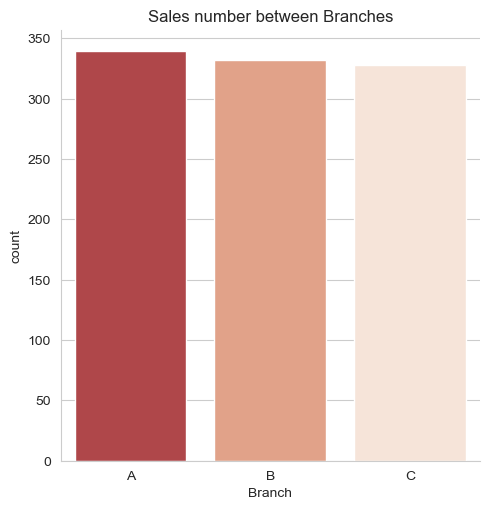

In [17]:
# visualized Branch column 

# 1- create count plot
sns.catplot(x = "Branch", data = data, kind = "count", order = data.Branch.value_counts().index)
plt.title("Sales number between Branches")
plt.show()

### From the above

- #### We have 3 Branches A, B and C

    - Branche `A` has largest Sales numbers
    - Branche `C` has fewest Sales numbers

### Discovering `Customer type` column

In [18]:
# show unique values

data["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

In [19]:
# output value counts of each unique values

data["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

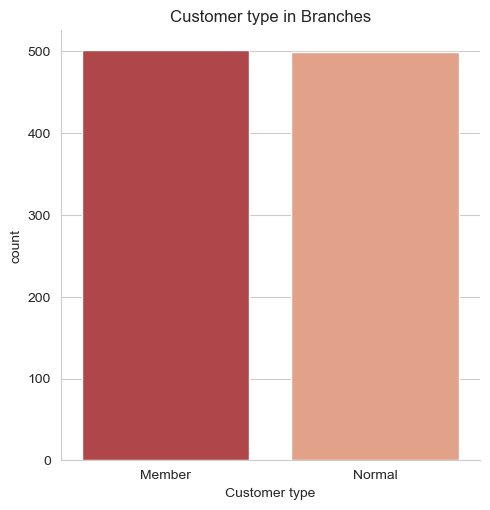

In [20]:
# visualized Customer type column 

# 1- create count plot
sns.catplot(x = "Customer type", data = data, kind = "count", order = data["Customer type"].value_counts().index)
plt.title("Customer type in Branches")
plt.show()


### From the above

- Most people come to branches has `member card`

### Discovering `Gender` column

In [21]:
# show unique values

data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
# output value counts of each unique values

data["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

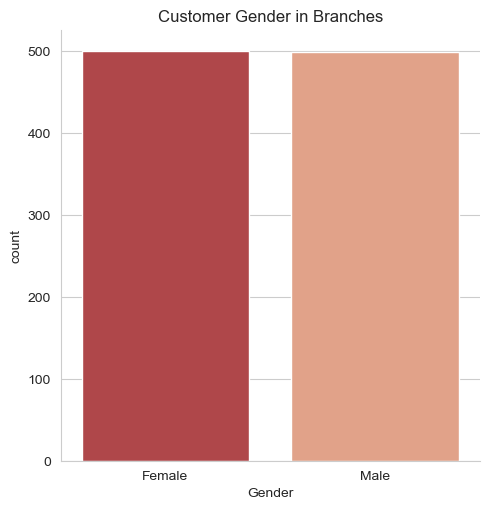

In [23]:
# visualized Gender column 

# 1- create count plot
sns.catplot(x = "Gender", data = data, kind = "count", order = data.Gender.value_counts().index)
plt.title("Customer Gender in Branches")
plt.show()

### From the above

- Most Gender Come to branches is `female`

### Discovering `Product line` column

In [24]:
# show unique values

data["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [25]:
# output value counts of each unique values

data["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

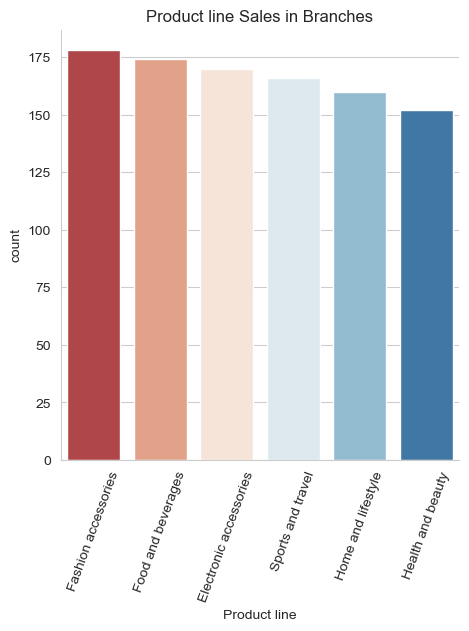

In [26]:
# visualized Product line column 

# 1- create count plot
sns.catplot(x = "Product line", data = data, kind = "count", order = data["Product line"].value_counts().index)
plt.title("Product line Sales in Branches")
plt.xticks(rotation = 70)
plt.show()

### From the above

- Most sales in branches is `Fashion accessories`

### Discovering `Payment` column

In [27]:
# show unique values

data["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [28]:
# output value counts of each unique values

data["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

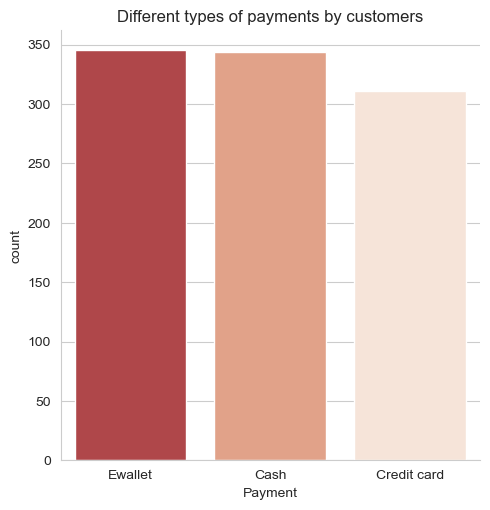

In [29]:
# visualized Payment column 

# 1- create count plot
sns.catplot(x = "Payment", data = data, kind = "count", order = data.Payment.value_counts().index)
plt.title("Different types of payments by customers")
plt.show()

### From the above

- Customers prefered to `Ewallet`,`cash payments`

### Discovering `Rating` column

In [30]:
# show unique values

data["Rating"].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

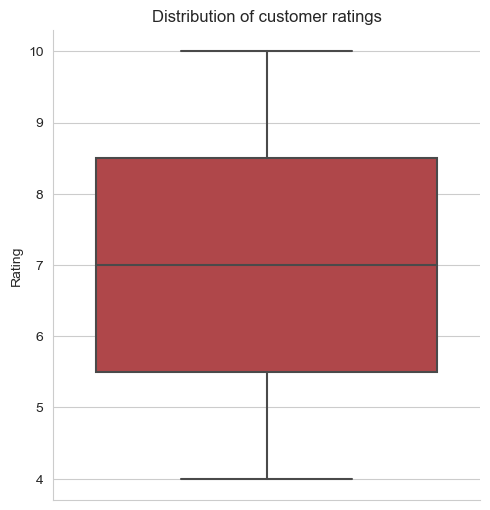

In [31]:
# visualized Rating column 

# 1- create count plot
sns.catplot(y = "Rating", data = data, kind = "box")
plt.title("Distribution of customer ratings")
plt.show()

### From the above

- Average rating across products is approximately `7`

### Discovering `Month` column

In [48]:
# output value counts of each unique values

data["Month"].value_counts(dropna = False)

January     352
March       345
February    303
Name: Month, dtype: int64

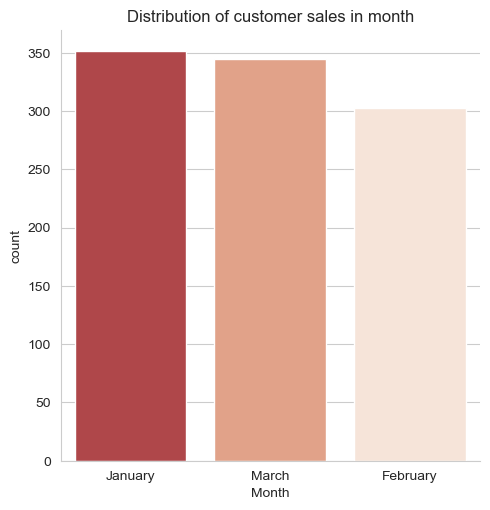

In [51]:
# visualized Month column 

# 1- create count plot
sns.catplot(x = "Month", data = data, kind = "count")
plt.title("Distribution of customer sales in month")
plt.show()

- Most sales in january month

## Exploratory Data Analysis

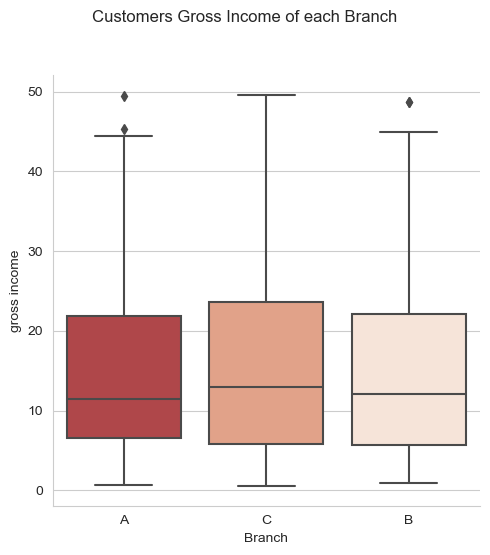

In [32]:
# show Gross Income of each Branch

fig = sns.catplot(x = "Branch", y = "gross income", data = data, kind = "box")
fig.fig.suptitle("Customers Gross Income of each Branch", y = 1.1)
plt.show()



- Branch `C` stands out slightly with higher income compared to Branch `A` and `B`. Despite Branch `A` having slightly higher sales, it is Branch `C`  that emerges as the most profitable branch in terms of gross income

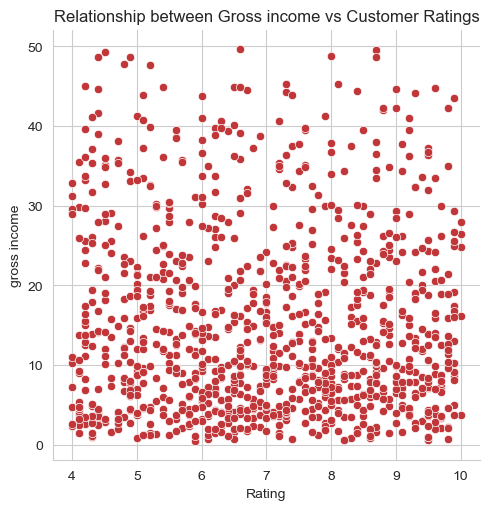

In [46]:
# There is relationship between gross income and customer ratings?

sns.relplot(x = "Rating", y = "gross income", data = data, kind = "scatter")
plt.title("Relationship between Gross income vs Customer Ratings")
plt.show()

- No relationship between rating and gross income

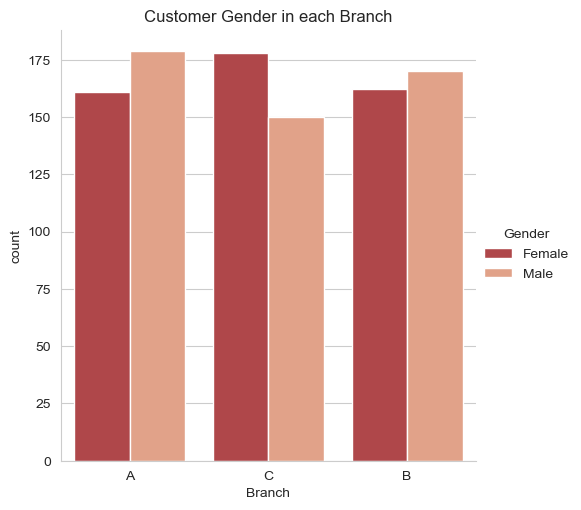

In [34]:
# show gender come to branches

sns.catplot(x = "Branch", hue = "Gender", data = data, kind = "count")
plt.title("Customer Gender in each Branch")
plt.show()

- Branch `A`,`B` has males greater than females, but branch `C` has females greater than males

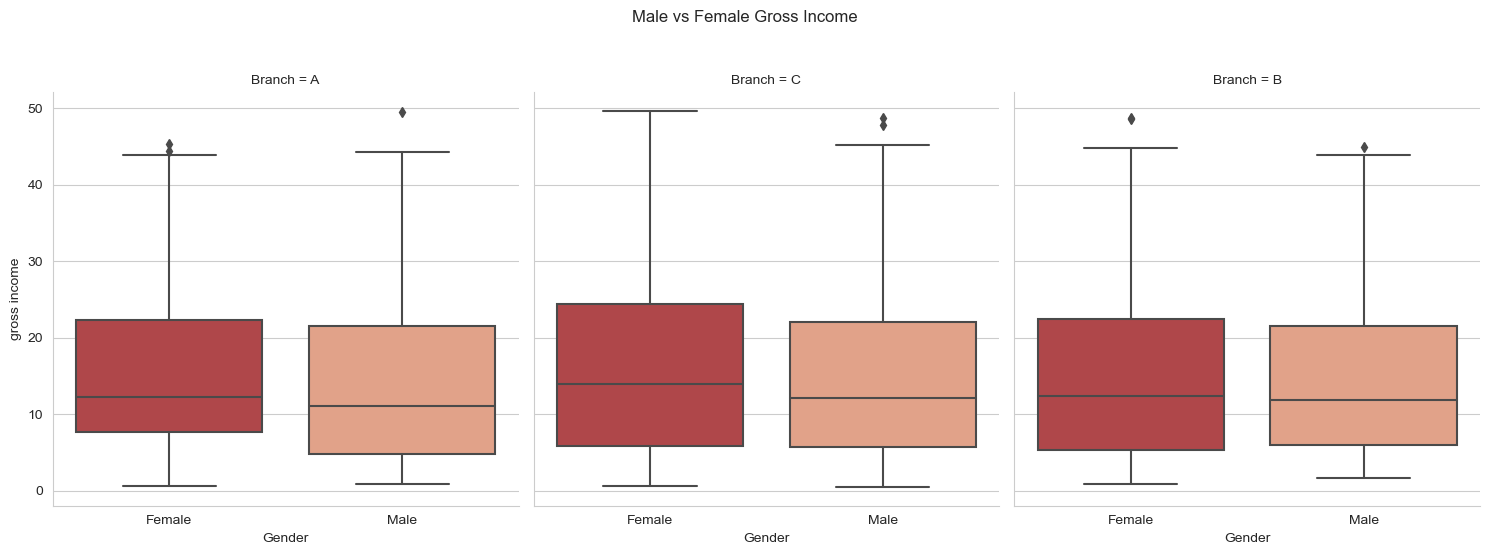

In [35]:
# What is male and female gross income in each branch?

fig = sns.catplot(x = "Gender", y = "gross income", data = data, kind = "box", col = "Branch")
fig.fig.suptitle("Male vs Female Gross Income", y = 1.1)
plt.show()

- Female gross income greater than Male in each branch

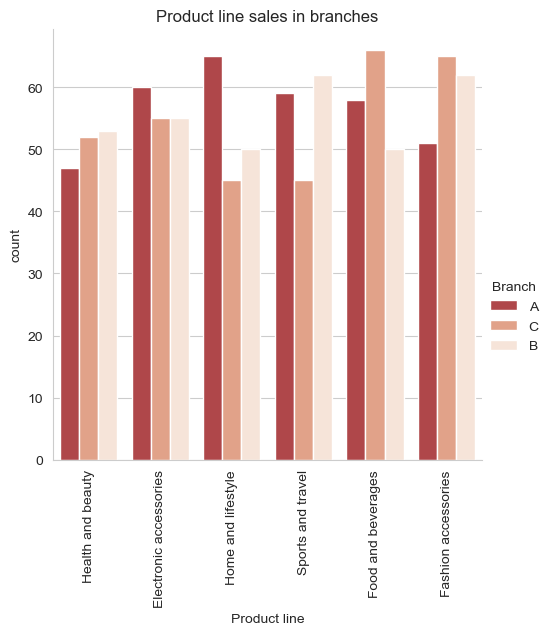

In [36]:
# show sales product line in branches

sns.catplot(x = "Product line", data = data, kind = "count", hue = "Branch")
plt.title("Product line sales in branches")
plt.xticks(rotation = 90)
plt.show()

### From above
- Electronic accessories, Home and lifestyle is the most sales in branch A
- Health and beauty, Sports and travel is the most sales in branch B
- Food and beverages, Fashion accessories is the most sales in branch C

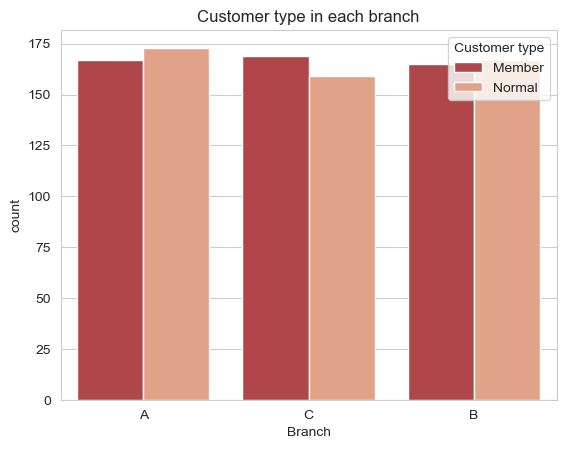

In [37]:
# show customer type in each branch

sns.countplot(x = "Branch", data = data, hue = "Customer type")
plt.title("Customer type in each branch")
plt.show()

### From above
- Branch `A`, `Normal` customer greater than `Member`
- Branch `B`, `Normal` customer greater than `Member`
- Branch `C`, `Member` customer greater than `Normal`

#### `When  number of members in Branch increased,Total of gross income increased` 

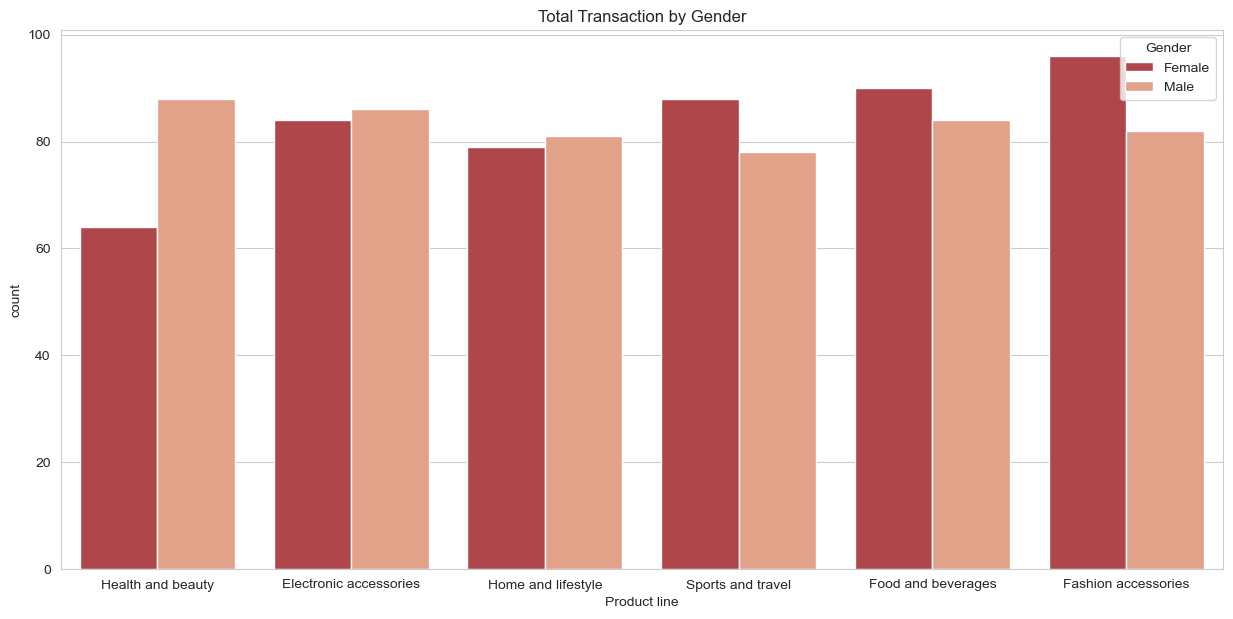

In [38]:
# show Customer gender VS Product line

plt.figure(figsize = (15,7))
sns.countplot(x = "Product line", data = data, hue = "Gender")
plt.title("Total Transaction by Gender")
plt.show()


####  When number of females increase, `Fashion accessories` Product line increase

#### When number of male increase,`Health and beauty` Product line increase


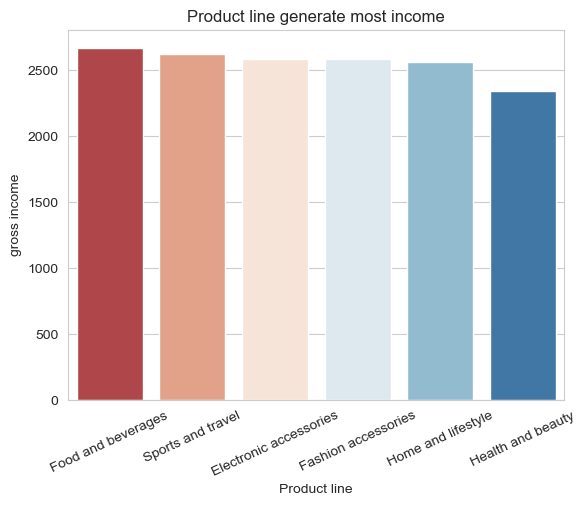

In [39]:
# Which product line have greater gross income?

# 1- create products dataFrame
products = data.groupby("Product line")[["gross income"]].sum().sort_values(by = "gross income", ascending = False)

# 2- visualized products
sns.barplot(x = products.index, y = "gross income", data = products)
plt.title("Product line generate most income")
plt.xticks(rotation = 25)
plt.show()

-  Gross income is highest in `food and beverages`

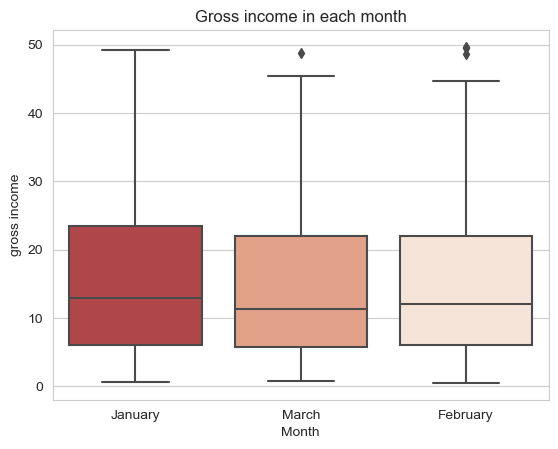

In [40]:
# What is month has greater gross income?

sns.boxplot(x = "Month", y = "gross income", data = data)
plt.title("Gross income in each month")
plt.show()

- january month has greater gross income

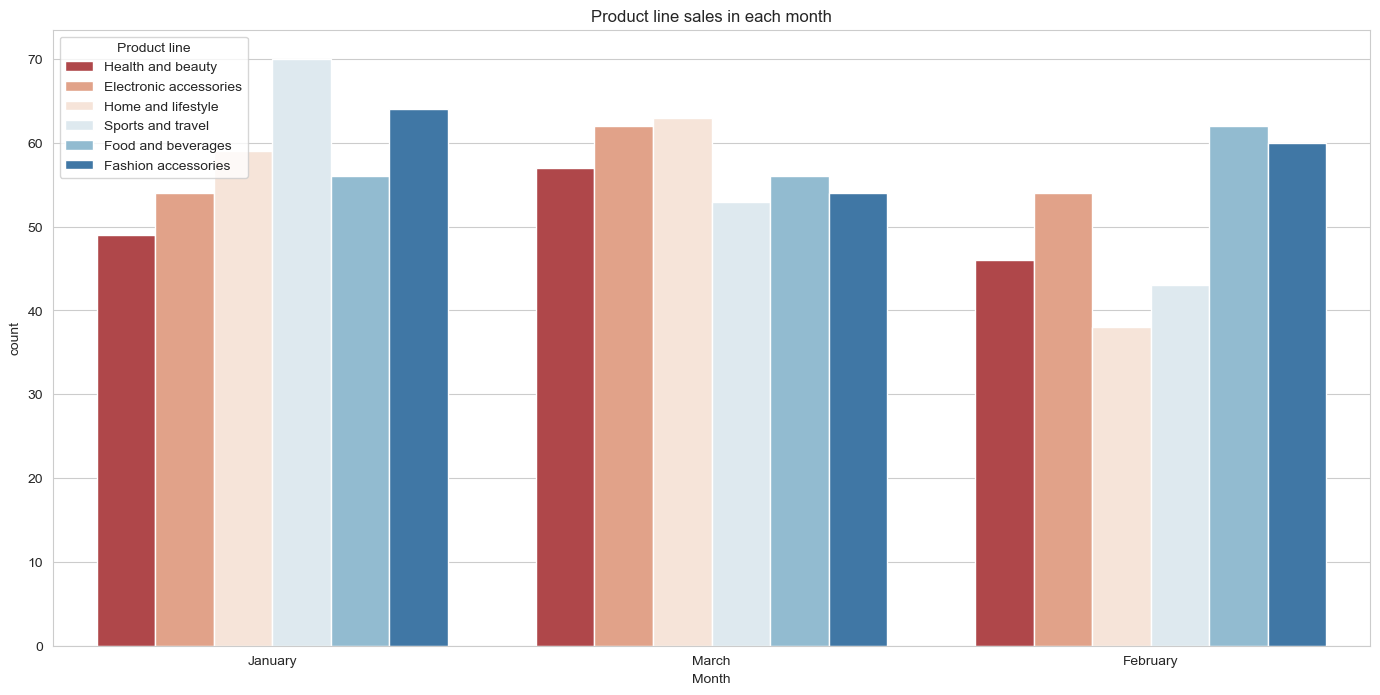

In [41]:
# What is greater sales  product line in each month?

plt.figure(figsize = (17,8))
fig = sns.countplot(x = "Month", data = data, hue = "Product line")
plt.title("Product line sales in each month")
plt.show()

### From above
- #### 1. January month
  - Sports and travel, Fashion accessories is the most product line sales 

- #### 2. March month
    - Electronic accessories, Home and lifestyle is the most product line sales 

- #### 3. February month
    - Food and beverages, Fashion accessories is the most product line sales 


## Conclusion

- #### Customer average rating of approximately `7`. there was no relationship between customer ratings and gross income

- #### Among the three branches, Branch `C` as the most profitable in terms of gross income, despite Branch `A` having slightly higher sales

- #### `Fashion Accessories` and `Food and Beverages` were the most products. Therefore, must focus on these categories, with electronic accessories

- #### The preferred payment method for customers was found to be `Ewallet` and `Cash`

- #### `Food and Beverage` proved to be the category generating the highest gross income overall

- #### Females  spend the most on `fashion accessories`, while males  preference for `health and beauty` products Females also spending on `sports and travel`, which contributed to the highest overall income

- #### `In the end, there was no relationship between customer ratings were not significantly related to any variable`